<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/CutMix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

笔记书上

视频
https://www.youtube.com/watch?v=VyJlSvtOJqQ

文章
https://www.jianshu.com/p/639f9ecc1328

代码
https://github.com/ildoonet/cutmix/blob/master/cutmix/cutmix.py#L4

# **CutMix后->思考效果为啥不好**
具体CutMix后图片拼接,好观察一点

https://github.com/2714830587-xh/CLRS-GG/blob/master/Kaggle_dataloader.ipynb


深度学习训练非常容易造成过拟合，需要大量数据以及各类正则化方法。
数据增强可以看做是一种正则化方法

图片小物体太集中了->像素低->cutmix是从局部识别视图

如果图片中的物体比较小,有效物体站总体面积比例越小效果越好,图片尺寸大一点好些

# **数据增强 - Cutout、Random Erasing、Mixup、Cutmix**
https://icode.best/i/63069838431417

# **Dataset,DataLoader显示图像和标签-**


 axes don't match array错误的两种解决方式
 加载一个batchsize数据显示

 发一:imshow(torchvision.utils.make_grid(images))

 法2:for j in range(inputs.size()[0]):
    print(labels[j])
    imshow(inputs.data[j])


Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32])
6


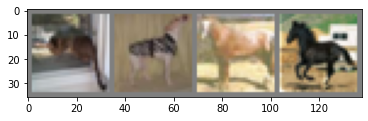

GroundTruth:    cat   dog horse horse


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as  np
from torch.utils.data import DataLoader
from tqdm import tqdm#引入进度条
# GPU OR CPU
decive=torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyperparams
num_epochs=5
batch_size=4
lr=0.001


# PIL to tensor
transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

#  CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset=torchvision.datasets.CIFAR10("../data",train=True,transform=transforms,download=True)
test_dataset=torchvision.datasets.CIFAR10("../data",train=False,transform=transforms,download=True)
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=False)


img, target = train_dataset[0]
print(img.shape)  # torch.Size([3, 32, 32]) 单张图片的尺寸和通道数
print(target)  # 输出为 3
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
# 制作的迭代器 --由于有batch_size可以迭代
dataiter = iter(train_loader)
len(dataiter)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))#make_grid的作用是将若干幅图像拼成一幅图像
plt.show()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# **CutMix**
图片拼接

In [ ]:
!pip install git+https://github.com/ildoonet/cutmix
from cutmix.cutmix import CutMix

  Cloning https://github.com/ildoonet/cutmix to /tmp/pip-req-build-8lrua7zw
  Running command git clone -q https://github.com/ildoonet/cutmix /tmp/pip-req-build-8lrua7zw
  Created wheel for cutmix: filename=cutmix-0.1-py3-none-any.whl size=3599 sha256=9d54af31d4f6f65ac0ff6c626f7e7e9a0150352e084fff49b26d50ff25bb5e1e
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ybh7gop/wheels/a9/81/a7/d3822499b14d97b1e2ef7e7538b70f15355607cfc7526f7cd5
Successfully built cutmix


torch.Size([3, 32, 32])
tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])


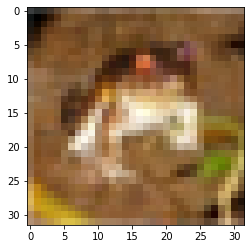

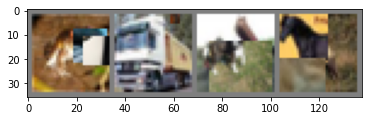

tensor([0.0000, 0.3652, 0.0000, 0.0000, 0.0000, 0.0000, 0.6348, 0.0000, 0.0000,
        0.0000])


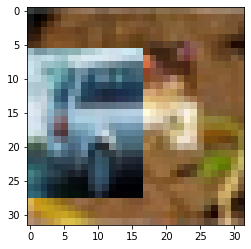

tensor([0.0000, 0.0000, 0.0000, 0.4062, 0.0000, 0.0000, 0.2412, 0.0000, 0.0000,
        0.3525])


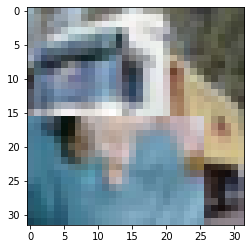

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


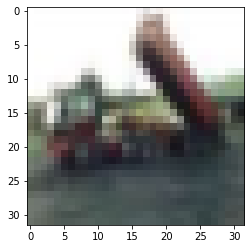

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.8594, 0.0000, 0.0000, 0.0000, 0.0000,
        0.1406])


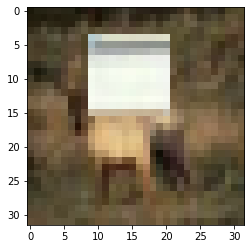

In [ ]:
target=CutMix(train_dataset, num_class=10, beta=1.0, prob=0.5, num_mix=1)

trainloader = torch.utils.data.DataLoader(
                      CutMix(train_dataset, num_class=10, beta=1.0, prob=0.5, num_mix=2), 
                      batch_size=4, num_workers=0)
img,label=target[0]
print(img.shape)  # torch.Size([3, 32, 32]) 单张图片的尺寸和通道数
print(target[0][1])
imshow(img)

dataiter = iter(trainloader)

inputs, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
for j in range(inputs.size()[0]):
    print(labels[j])
    imshow(inputs.data[j])

Files already downloaded and verified
Files already downloaded and verified


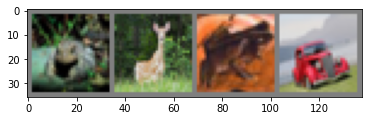

GroundTruth:   frog  deer  frog   car


 16%|█▌        | 2026/12500 [00:08<00:43, 238.97it/s]

Epoch [1/5], Step [2000/12500], Loss: 2.2972


 32%|███▏      | 4037/12500 [00:16<00:34, 246.30it/s]

Epoch [1/5], Step [4000/12500], Loss: 2.3238


 48%|████▊     | 6041/12500 [00:24<00:26, 242.97it/s]

Epoch [1/5], Step [6000/12500], Loss: 2.2476


 64%|██████▍   | 8040/12500 [00:32<00:17, 251.72it/s]

Epoch [1/5], Step [8000/12500], Loss: 2.2163


 80%|████████  | 10028/12500 [00:41<00:09, 252.55it/s]

Epoch [1/5], Step [10000/12500], Loss: 2.1116


 96%|█████████▋| 12048/12500 [00:49<00:01, 238.82it/s]

Epoch [1/5], Step [12000/12500], Loss: 2.4143


 16%|█▋        | 2037/12500 [00:08<00:43, 243.04it/s]

Epoch [2/5], Step [2000/12500], Loss: 2.3495


 32%|███▏      | 4046/12500 [00:16<00:34, 241.64it/s]

Epoch [2/5], Step [4000/12500], Loss: 1.7534


 48%|████▊     | 6028/12500 [00:25<00:27, 238.77it/s]

Epoch [2/5], Step [6000/12500], Loss: 1.9082


 64%|██████▍   | 8037/12500 [00:33<00:18, 237.20it/s]

Epoch [2/5], Step [8000/12500], Loss: 1.7243


 80%|████████  | 10032/12500 [00:42<00:10, 245.24it/s]

Epoch [2/5], Step [10000/12500], Loss: 2.3216


 96%|█████████▋| 12034/12500 [00:50<00:01, 248.28it/s]

Epoch [2/5], Step [12000/12500], Loss: 1.2264


 16%|█▋        | 2049/12500 [00:08<00:41, 253.59it/s]

Epoch [3/5], Step [2000/12500], Loss: 2.0868


 32%|███▏      | 4047/12500 [00:16<00:35, 240.52it/s]

Epoch [3/5], Step [4000/12500], Loss: 1.5911


 48%|████▊     | 6031/12500 [00:24<00:26, 241.62it/s]

Epoch [3/5], Step [6000/12500], Loss: 1.6199


 64%|██████▍   | 8025/12500 [00:32<00:18, 239.46it/s]

Epoch [3/5], Step [8000/12500], Loss: 1.3958


 80%|████████  | 10047/12500 [00:41<00:10, 238.52it/s]

Epoch [3/5], Step [10000/12500], Loss: 1.7172


 96%|█████████▌| 12028/12500 [00:49<00:01, 239.41it/s]

Epoch [3/5], Step [12000/12500], Loss: 1.5317


 16%|█▌        | 2031/12500 [00:08<00:42, 247.45it/s]

Epoch [4/5], Step [2000/12500], Loss: 1.9696


 32%|███▏      | 4031/12500 [00:16<00:34, 248.18it/s]

Epoch [4/5], Step [4000/12500], Loss: 1.2629


 48%|████▊     | 6024/12500 [00:25<00:26, 240.85it/s]

Epoch [4/5], Step [6000/12500], Loss: 0.8251


 64%|██████▍   | 8045/12500 [00:33<00:18, 237.37it/s]

Epoch [4/5], Step [8000/12500], Loss: 1.1406


 80%|████████  | 10034/12500 [00:41<00:10, 238.75it/s]

Epoch [4/5], Step [10000/12500], Loss: 1.9577


 96%|█████████▋| 12032/12500 [00:49<00:01, 237.86it/s]

Epoch [4/5], Step [12000/12500], Loss: 1.1984


 16%|█▌        | 2028/12500 [00:08<00:42, 248.27it/s]

Epoch [5/5], Step [2000/12500], Loss: 1.5439


 32%|███▏      | 4030/12500 [00:16<00:36, 232.12it/s]

Epoch [5/5], Step [4000/12500], Loss: 1.2551


 48%|████▊     | 6047/12500 [00:25<00:26, 245.97it/s]

Epoch [5/5], Step [6000/12500], Loss: 1.7823


 64%|██████▍   | 8041/12500 [00:33<00:18, 242.52it/s]

Epoch [5/5], Step [8000/12500], Loss: 1.2736


 80%|████████  | 10022/12500 [00:41<00:09, 250.40it/s]

Epoch [5/5], Step [10000/12500], Loss: 1.0856


 96%|█████████▋| 12048/12500 [00:50<00:01, 243.22it/s]

Epoch [5/5], Step [12000/12500], Loss: 1.4437


100%|██████████| 12500/12500 [00:52<00:00, 240.00it/s]


Finished Training
total acc 0.4922
Accuracy of plane:54.2%
Accuracy of car:58.1%
Accuracy of bird:34.0%
Accuracy of cat:41.3%
Accuracy of deer:47.4%
Accuracy of dog:27.5%
Accuracy of frog:58.3%
Accuracy of horse:58.2%
Accuracy of ship:65.9%
Accuracy of truck:47.3%


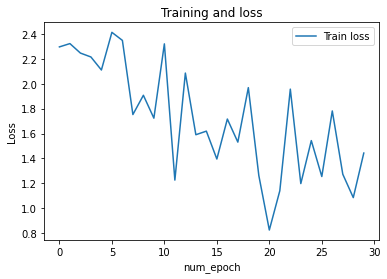

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as  np
from torch.utils.data import DataLoader
from tqdm import tqdm#引入进度条

# GPU OR CPU
decive=torch.device("cuda" if torch.cuda.is_available() else "cpu")

# hyperparams
num_epochs=5
batch_size=16
lr=0.001


# PIL to tensor
transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

#  CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset=torchvision.datasets.CIFAR10("../data",train=True,transform=transforms,download=True)
test_dataset=torchvision.datasets.CIFAR10("../data",train=False,transform=transforms,download=True)
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
# 制作的迭代器
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
plt.show()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)#计算h=(h_in-ker_size=2*pad)/stride+1 w类似
        self.maxpool1=nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self.conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5)
        self.maxpool2=nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.fc1=nn.Linear(16*5*5,200)
        self.fc2=nn.Linear(200,100)
        self.fc3=nn.Linear(100,10)
        self.relu=nn.ReLU()
    def forward(self, x):
        x=self.maxpool1(self.relu(self.conv1(x)))
        x=self.maxpool2(self.relu(self.conv2(x)))
        x=x.reshape(-1,16*5*5)
        x=self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
#     test model
# net=ConvNet()
# x=torch.randn((4,3,32,32))
# print(net(x).shape)
train_loss=[]
n_total_steps = len(train_loader)
net=ConvNet().to(decive)
criterion= CutMixCrossEntropyLoss(True)
optimser=torch.optim.SGD(net.parameters(),lr=lr)
train_loss=[]
for epoch in range(num_epochs):
    for batch_index,(imgs,labels) in enumerate(tqdm(train_loader)):
        imgs=imgs.to(decive)
        labels=labels.to(decive)


        # forward_pro
        out=net(imgs)
        loss=criterion(out,labels)
        #backward_pro
        optimser.zero_grad()
        loss.backward()
        optimser.step()

        if(batch_index+1)%2000==0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{batch_index + 1}/{n_total_steps}], Loss: {loss.item():.4f}')
            train_loss.append(loss.item())

print('Finished Training')
PATH = './cnn.pth'
torch.save(net.state_dict(), PATH)

with torch.no_grad():
    n_correct=0
    n_sample=0
    n_class_correct=[0 for i in range(10)]
    n_class_sample = [0 for i in range(10)]
    for imgs,labels in test_loader:
        imgs = imgs.to(decive)
        labels = labels.to(decive)

        out=net(imgs)
        # max returns (value ,index)
        _,pre_index=torch.max(out,1)
        n_correct+=(pre_index==labels).sum().item()
        n_sample+=pre_index.size(0)

        for i in range(len(pre_index)):
            if(pre_index[i]==labels[i]):
                n_class_correct[labels[i]]+=1
            n_class_sample[labels[i]]+=1
    print("total acc",n_correct/n_sample)
    for i in range(10):
        acc=100.0*n_class_correct[i]/n_class_sample[i]
        print(f'Accuracy of {classes[i]}:{acc}%')

plt.plot(range(len(train_loss)), train_loss, label='Train loss')

plt.xlabel("num_epoch")
plt.ylabel("Loss")
plt.title("Training and loss")
plt.legend()
plt.show()


In [ ]:
!nvidia-smi

Thu Apr 28 04:05:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **用CutMix改过后train_loader和相应的损失函数**

CutMixCrossEntropyLoss(True)

cuda改成了cpu


Files already downloaded and verified
Files already downloaded and verified


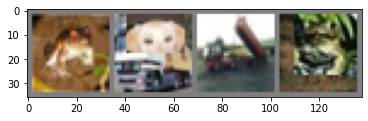

 16%|█▌        | 2021/12500 [00:14<01:13, 142.08it/s]

Epoch [1/5], Step [2000/12500], Loss: 2.3028


 32%|███▏      | 4027/12500 [00:28<00:59, 143.53it/s]

Epoch [1/5], Step [4000/12500], Loss: 2.3123


 48%|████▊     | 6018/12500 [00:41<00:43, 149.14it/s]

Epoch [1/5], Step [6000/12500], Loss: 2.3071


 64%|██████▍   | 8017/12500 [00:55<00:30, 147.75it/s]

Epoch [1/5], Step [8000/12500], Loss: 2.2789


 80%|████████  | 10028/12500 [01:09<00:16, 146.05it/s]

Epoch [1/5], Step [10000/12500], Loss: 2.2914


 96%|█████████▌| 12011/12500 [01:23<00:03, 143.90it/s]

Epoch [1/5], Step [12000/12500], Loss: 2.2875


 16%|█▌        | 2026/12500 [00:14<01:12, 143.55it/s]

Epoch [2/5], Step [2000/12500], Loss: 2.2556


 32%|███▏      | 4019/12500 [00:28<00:58, 145.49it/s]

Epoch [2/5], Step [4000/12500], Loss: 2.3288


 48%|████▊     | 6027/12500 [00:42<00:44, 144.05it/s]

Epoch [2/5], Step [6000/12500], Loss: 2.2697


 64%|██████▍   | 8025/12500 [00:55<00:30, 147.29it/s]

Epoch [2/5], Step [8000/12500], Loss: 2.4021


 80%|████████  | 10019/12500 [01:09<00:17, 145.50it/s]

Epoch [2/5], Step [10000/12500], Loss: 2.2878


 96%|█████████▌| 12024/12500 [01:23<00:03, 153.97it/s]

Epoch [2/5], Step [12000/12500], Loss: 2.0362


 16%|█▌        | 2016/12500 [00:13<01:12, 144.30it/s]

Epoch [3/5], Step [2000/12500], Loss: 2.1198


 32%|███▏      | 4023/12500 [00:27<00:58, 144.10it/s]

Epoch [3/5], Step [4000/12500], Loss: 2.2730


 48%|████▊     | 6022/12500 [00:41<00:45, 141.34it/s]

Epoch [3/5], Step [6000/12500], Loss: 2.3019


 64%|██████▍   | 8024/12500 [00:55<00:32, 137.90it/s]

Epoch [3/5], Step [8000/12500], Loss: 2.0167


 80%|████████  | 10029/12500 [01:09<00:17, 142.66it/s]

Epoch [3/5], Step [10000/12500], Loss: 2.4945


 96%|█████████▌| 12020/12500 [01:23<00:03, 141.42it/s]

Epoch [3/5], Step [12000/12500], Loss: 2.1133


 16%|█▌        | 2030/12500 [00:14<01:09, 150.87it/s]

Epoch [4/5], Step [2000/12500], Loss: 2.3670


 32%|███▏      | 4020/12500 [00:27<00:57, 148.66it/s]

Epoch [4/5], Step [4000/12500], Loss: 2.0934


 48%|████▊     | 6020/12500 [00:41<00:44, 146.56it/s]

Epoch [4/5], Step [6000/12500], Loss: 2.0828


 64%|██████▍   | 8023/12500 [00:55<00:31, 142.74it/s]

Epoch [4/5], Step [8000/12500], Loss: 2.0810


 80%|████████  | 10023/12500 [01:09<00:16, 145.76it/s]

Epoch [4/5], Step [10000/12500], Loss: 2.3379


 96%|█████████▌| 12025/12500 [01:23<00:03, 141.79it/s]

Epoch [4/5], Step [12000/12500], Loss: 2.2443


 16%|█▌        | 2015/12500 [00:14<01:13, 142.69it/s]

Epoch [5/5], Step [2000/12500], Loss: 2.3533


 32%|███▏      | 4022/12500 [00:28<01:00, 141.13it/s]

Epoch [5/5], Step [4000/12500], Loss: 2.0159


 48%|████▊     | 6023/12500 [00:42<00:45, 142.60it/s]

Epoch [5/5], Step [6000/12500], Loss: 2.0679


 64%|██████▍   | 8016/12500 [00:56<00:31, 144.45it/s]

Epoch [5/5], Step [8000/12500], Loss: 2.1224


 80%|████████  | 10027/12500 [01:10<00:17, 139.08it/s]

Epoch [5/5], Step [10000/12500], Loss: 1.9949


 96%|█████████▌| 12023/12500 [01:24<00:03, 137.65it/s]

Epoch [5/5], Step [12000/12500], Loss: 1.8632


100%|██████████| 12500/12500 [01:27<00:00, 142.74it/s]


Finished Training
total acc 0.4096
Accuracy of plane:35.3%
Accuracy of car:67.4%
Accuracy of bird:12.2%
Accuracy of cat:19.9%
Accuracy of deer:29.0%
Accuracy of dog:40.1%
Accuracy of frog:62.3%
Accuracy of horse:50.1%
Accuracy of ship:57.8%
Accuracy of truck:35.5%


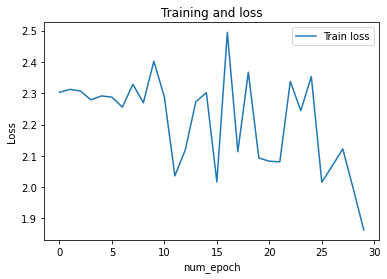

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as  np
from torch.utils.data import DataLoader
from tqdm import tqdm#引入进度\
from cutmix.cutmix import CutMix
from cutmix.utils import CutMixCrossEntropyLoss
# GPU OR CPU
decive=torch.device("cuda" if torch.cuda.is_available() else "cpu")



# hyperparams
num_epochs=5
batch_size=100
lr=0.001


# PIL to tensor
transforms=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

#  CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset=torchvision.datasets.CIFAR10("../data",train=True,transform=transforms,download=True)
test_dataset=torchvision.datasets.CIFAR10("../data",train=False,transform=transforms,download=True)
# train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
train_loader = torch.utils.data.DataLoader(
                      CutMix(train_dataset, num_class=10, beta=1.0, prob=0.5, num_mix=2), 
                      batch_size=4, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
# 制作的迭代器
dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
plt.show()


# 标签不是one_hot了
# print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))



class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5)#计算h=(h_in-ker_size=2*pad)/stride+1 w类似
        self.maxpool1=nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        self.conv2=nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5)
        self.maxpool2=nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        self.fc1=nn.Linear(16*5*5,200)
        self.fc2=nn.Linear(200,100)
        self.fc3=nn.Linear(100,10)
        self.relu=nn.ReLU()
    def forward(self, x):
        x=self.maxpool1(self.relu(self.conv1(x)))
        x=self.maxpool2(self.relu(self.conv2(x)))
        x=x.reshape(-1,16*5*5)
        x=self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
#     test model
# net=ConvNet()
# x=torch.randn((4,3,32,32))
# print(net(x).shape)

n_total_steps = len(train_loader)
net=ConvNet().to(decive)
criterion=CutMixCrossEntropyLoss(True)
optimser=torch.optim.SGD(net.parameters(),lr=lr)
train_loss=[]
for epoch in range(num_epochs):
    for batch_index,(imgs,labels) in enumerate(tqdm(train_loader)):
        imgs=imgs.to(decive)
        labels=labels.to(decive)


        # forward_pro
        out=net(imgs)
        loss=criterion(out,labels)
        #backward_pro
        optimser.zero_grad()
        loss.backward()
        optimser.step()

        if(batch_index+1)%2000==0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{batch_index + 1}/{n_total_steps}], Loss: {loss.item():.4f}')
            train_loss.append(loss.item())

print('Finished Training')
PATH = './cnn.pth'
torch.save(net.state_dict(), PATH)

with torch.no_grad():
    n_correct=0
    n_sample=0
    n_class_correct=[0 for i in range(10)]
    n_class_sample = [0 for i in range(10)]
    for imgs,labels in test_loader:
        imgs = imgs.to(decive)
        labels = labels.to(decive)

        out=net(imgs)
        # max returns (value ,index)
        _,pre_index=torch.max(out,1)
        n_correct+=(pre_index==labels).sum().item()
        n_sample+=pre_index.size(0)

        for i in range(len(pre_index)):
            if(pre_index[i]==labels[i]):
                n_class_correct[labels[i]]+=1
            n_class_sample[labels[i]]+=1
    print("total acc",n_correct/n_sample)
    for i in range(10):
        acc=100.0*n_class_correct[i]/n_class_sample[i]
        print(f'Accuracy of {classes[i]}:{acc}%')

plt.plot(range(len(train_loss)), train_loss, label='Train loss')

plt.xlabel("num_epoch")
plt.ylabel("Loss")
plt.title("Training and loss")
plt.legend()
plt.show()
